In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import rasterio as rio
import seaborn as sns
import os, glob
from tifffile import imsave
import cv2
import tarfile
import pyproj as proj
from osgeo import gdal
import rasterio
import itertools
import os
import csv
from scipy.interpolate import griddata
#from arcpy import env
from rasterstats import zonal_stats
%matplotlib inline
import openturns as ot
import openturns.viewer as viewer
path = os.getcwd()

In [2]:
path='E:\program'
os.chdir(path)

All together

In [67]:
inputFolder=r'CMIP\model_1_370_max'
df_subb_577=[]
model_1_370=[[] for _ in range(52)]
for j in range(25,45): #eerste 20 jaren
    file=os.listdir(inputFolder)[j]
    print(file)

2040.csv
2041.csv
2042.csv
2043.csv
2044.csv
2045.csv
2046.csv
2047.csv
2048.csv
2049.csv
2050.csv
2051.csv
2052.csv
2053.csv
2054.csv
2055.csv
2056.csv
2057.csv
2058.csv
2059.csv


In [74]:
df1.index

Index(['Subbasin-577', 'Subbasin-401', 'Subbasin-4', 'Subbasin-10',
       'Subbasin-15', 'Subbasin-28', 'Subbasin-48', 'Subbasin-52',
       'Subbasin-63', 'Subbasin-7', 'Subbasin-8', 'Subbasin-53', 'Subbasin-37',
       'Subbasin-31', 'Subbasin-24', 'Subbasin-6', 'Subbasin-18',
       'Subbasin-56', 'Subbasin-59', 'Subbasin-29', 'Subbasin-60',
       'Subbasin-25', 'Subbasin-2', 'Subbasin-3', 'Subbasin-12', 'Subbasin-33',
       'Subbasin-41', 'Subbasin-45', 'Subbasin-13', 'Subbasin-19',
       'Subbasin-30', 'Subbasin-9', 'Subbasin-54', 'Subbasin-47',
       'Subbasin-49', 'Subbasin-39', 'Subbasin-14', 'Subbasin-50',
       'Subbasin-27', 'Subbasin-55', 'Subbasin-35', 'Subbasin-23',
       'Subbasin-44', 'Subbasin-42', 'Subbasin-26', 'Subbasin-17',
       'Subbasin-38', 'Subbasin-21', 'Subbasin-22', 'Subbasin-5', 'Subbasin-1',
       'MMR'],
      dtype='object', name='name')

In [ ]:
def f2(y): #equal to frechet cdf distribution solved for x
    return (-np.log(y))**(-1/a)*(g*(-np.log(y))**(1/a)+b)

In [7]:
def hunderd_year_return_period_2050(inputFolder):
    subbassins=52
    model=[[] for _ in range(subbassins)]
    for j in range(20,50): #2040-2060 (25,45)
        file=os.listdir(inputFolder)[j]
        for i in np.arange(0,subbassins): #(subbassins)
            file_path1=os.path.join(inputFolder, file)
            df1 = pd.read_csv(file_path1,index_col='name')
            model[i].append(df1['rainfall'][i])
    
    df_100_return_period=pd.DataFrame()
    df_100_return_period.index=df1.index
    df_100_return_period["200-year return level [2040-2060]"]=''
    
    def f2(y): #equal to frechet cdf distribution solved for x
        return (-np.log(y))**(-1/a)*(g*(-np.log(y))**(1/a)+b)

    for i in range(subbassins):
        sample = ot.Sample([[p] for p in model[i]])
        distFrechet = ot.FrechetFactory().buildAsFrechet(sample)
        Fretcher_par=distFrechet.getParameter()
        b,a,g=Fretcher_par[0],Fretcher_par[1],Fretcher_par[2]
        df_100_return_period.iloc[i,0]=f2(0.995)      
    return df_100_return_period
    

In [8]:
m4_max=hunderd_year_return_period_2050(r'CMIP\model_4_370_max')
outputPath = os.path.join(r'CMIP', 'GEV_CanESM5-ssp370_200_year_return_level.csv')
m4_max.to_csv(outputPath)

In [9]:
m4_max=hunderd_year_return_period_2050(r'CMIP\model_4_585_max')
outputPath = os.path.join(r'CMIP', 'GEV_CanESM5-ssp585_200_year_return_level.csv')
m4_max.to_csv(outputPath)

In [101]:
m1_max=hunderd_year_return_period_2050(r'CMIP\model_1_370_max')
m2_max=hunderd_year_return_period_2050(r'CMIP\model_2_370_max')
m3_max=hunderd_year_return_period_2050(r'CMIP\model_3_370_max')
m4_max=hunderd_year_return_period_2050(r'CMIP\model_4_370_max')
m5_max=hunderd_year_return_period_2050(r'CMIP\model_5_370_max')
m6_max=hunderd_year_return_period_2050(r'CMIP\model_6_370_max')
m7_max=hunderd_year_return_period_2050(r'CMIP\model_7_370_max')
m8_max=hunderd_year_return_period_2050(r'CMIP\model_8_370_max')
m9_max=hunderd_year_return_period_2050(r'CMIP\model_9_370_max')
m10_max=hunderd_year_return_period_2050(r'CMIP\model_10_370_max')
m11_max=hunderd_year_return_period_2050(r'CMIP\model_11_370_max')
m12_max=hunderd_year_return_period_2050(r'CMIP\model_12_370_max')
m13_max=hunderd_year_return_period_2050(r'CMIP\model_13_370_max')


In [109]:
m4_max=hunderd_year_return_period_2050(r'CMIP\model_4_585_max')

FileNotFoundError: [WinError 3] Het systeem kan het opgegeven pad niet vinden: 'CMIP\\model_4_585_max'

In [102]:
result = pd.concat([m1_max, m2_max,m3_max,m4_max,m5_max,m6_max,m7_max,m8_max,m9_max,m10_max,m11_max,m12_max,m13_max], axis=1, join="inner")

In [103]:
result    

,100-year return level [2040-2060],100-year return level [2040-2060],100-year return level [2040-2060],100-year return level [2040-2060],100-year return level [2040-2060],100-year return level [2040-2060],100-year return level [2040-2060],100-year return level [2040-2060],100-year return level [2040-2060],100-year return level [2040-2060],100-year return level [2040-2060],100-year return level [2040-2060],100-year return level [2040-2060]
name,,,,,,,,,,,,,
Subbasin-577,533.909872,533.909872,533.909872,533.909872,533.909872,533.909872,533.909872,533.909872,533.909872,533.909872,533.909872,533.909872,533.909872
Subbasin-401,559.274357,559.274357,559.274357,559.274357,559.274357,559.274357,559.274357,559.274357,559.274357,559.274357,559.274357,559.274357,559.274357
Subbasin-4,509.36109,509.36109,509.36109,509.36109,509.36109,509.36109,509.36109,509.36109,509.36109,509.36109,509.36109,509.36109,509.36109
Subbasin-10,417.415166,417.415166,417.415166,417.415166,417.415166,417.415166,417.415166,417.415166,417.415166,417.415166,417.415166,417.415166,417.415166
Subbasin-15,417.415166,417.415166,417.415166,417.415166,417.415166,417.415166,417.415166,417.415166,417.415166,417.415166,417.415166,417.415166,417.415166
Subbasin-28,499.48399,499.48399,499.48399,499.48399,499.48399,499.48399,499.48399,499.48399,499.48399,499.48399,499.48399,499.48399,499.48399
Subbasin-48,509.25371,509.25371,509.25371,509.25371,509.25371,509.25371,509.25371,509.25371,509.25371,509.25371,509.25371,509.25371,509.25371
Subbasin-52,617.293792,617.293792,617.293792,617.293792,617.293792,617.293792,617.293792,617.293792,617.293792,617.293792,617.293792,617.293792,617.293792
Subbasin-63,531.978796,531.978796,531.978796,531.978796,531.978796,531.978796,531.978796,531.978796,531.978796,531.978796,531.978796,531.978796,531.978796


In [71]:
inputFolder=r'CMIP\model_1_370_max'
df_subb_577=[]
subbassins=52
model_1_370=[[] for _ in range(52)]
for j in range(25,45): #2040-2060
    file=os.listdir(inputFolder)[j]
    for i in np.arange(0,subbassins): #(subbassins)
        file_path1=os.path.join(inputFolder, file)
        df1 = pd.read_csv(file_path1,index_col='name')
        model_1_370[i].append(df1['rainfall'][i])

In [80]:
def f2(y): #equal to frechet cdf distribution solved for x
    return (-np.log(y))**(-1/a)*(g*(-np.log(y))**(1/a)+b)
df_100_return_period=pd.DataFrame()
df_100_return_period.index=df1.index
df_100_return_period["100-year return level [2040-2060]"]=''
for i in range(subbassins):
    sample = ot.Sample([[p] for p in model_1_370[i]])
    distFrechet = ot.FrechetFactory().buildAsFrechet(sample)
    list1=distFrechet.getParameter()
    b,a,g=list1[0],list1[1],list1[2]
    g=list1[2]
    df_100_return_period.iloc[i,0]=f2(0.99)

In [81]:
df_100_return_period

,100-year return level [2040-2060]
name,
Subbasin-577,533.909872
Subbasin-401,559.274357
Subbasin-4,509.36109
Subbasin-10,417.415166
Subbasin-15,417.415166
Subbasin-28,499.48399
Subbasin-48,509.25371
Subbasin-52,617.293792
Subbasin-63,531.978796


Test1

In [5]:
inputFolder=r'CMIP\model_1_370_max'
df_subb_577=[]
for file in  os.listdir(inputFolder):
    file_path1=os.path.join(inputFolder, file)
    df1 = pd.read_csv(file_path1,index_col='name')
    df_subb_577.append(df1['rainfall'][0])

In [11]:
import openturns as ot
import openturns.viewer as viewer
sample = ot.Sample([[p] for p in df_subb_577])
myDistribution = ot.GeneralizedExtremeValueFactory().buildAsGeneralizedExtremeValue(sample)
distFrechet = ot.FrechetFactory().buildAsFrechet(sample)


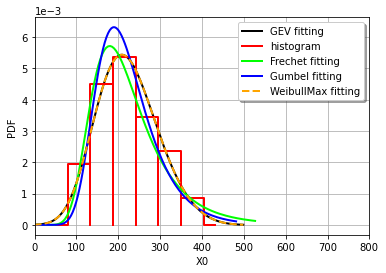

In [12]:
graph = myDistribution.drawPDF()
graph.add(ot.HistogramFactory().build(sample).drawPDF())

distFrechet = ot.FrechetFactory().buildAsFrechet(sample)
graph.add(distFrechet.drawPDF())

distGumbel = ot.GumbelFactory().buildAsGumbel(sample)
graph.add(distGumbel.drawPDF())

# We change the line style of the WeibullMax.
distWeibullMax = ot.WeibullMaxFactory().buildAsWeibullMax(sample)
curveWeibullMax = distWeibullMax.drawPDF().getDrawable(0)
curveWeibullMax.setLineStyle("dashed")
graph.add(curveWeibullMax)

graph.setColors(["black", "red", "green", "blue", "orange"])
graph.setLegends(
    [
        "GEV fitting",
        "histogram",
        "Frechet fitting",
        "Gumbel fitting",
        "WeibullMax fitting",
    ]
)
graph.setLegendPosition("topright")
view = viewer.View(graph)
axes = view.getAxes()  # axes is a matplotlib object
_ = axes[0].set_xlim(0, 800)

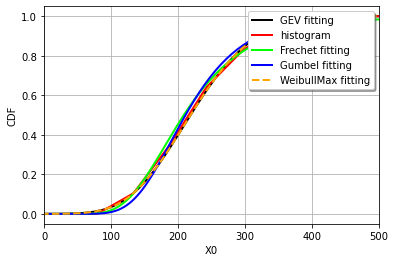

In [13]:
import openturns.viewer as viewer
graph = myDistribution.drawCDF()
graph.add(ot.HistogramFactory().build(sample).drawCDF())

distFrechet = ot.FrechetFactory().buildAsFrechet(sample)
graph.add(distFrechet.drawCDF())

distGumbel = ot.GumbelFactory().buildAsGumbel(sample)
graph.add(distGumbel.drawCDF())

# We change the line style of the WeibullMax.
distWeibullMax = ot.WeibullMaxFactory().buildAsWeibullMax(sample)
curveWeibullMax = distWeibullMax.drawCDF().getDrawable(0)
curveWeibullMax.setLineStyle("dashed")
graph.add(curveWeibullMax)

graph.setColors(["black", "red", "green", "blue", "orange"])
graph.setLegends(
    [
        "GEV fitting",
        "histogram",
        "Frechet fitting",
        "Gumbel fitting",
        "WeibullMax fitting",
    ]
)
graph.setLegendPosition("topright")
view = viewer.View(graph)
axes = view.getAxes()  # axes is a matplotlib object
_ = axes[0].set_xlim(0, 500)

In [23]:
list=distFrechet.getParameter()
b=list[0]
a=list[1]
g=list[2]

In [26]:
def f(x):
    return np.exp(-((x-g)/b)**(-a))

In [27]:
f(343.3741766734422)

0.8999997709745939

In [28]:
def f2(y): #equal to frechet cdf distribution solved for x
    return (-np.log(y))**(-1/a)*(g*(-np.log(y))**(1/a)+b)

In [29]:
f2(0.99)

542.2355935006607